In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from random import randint

2023-12-14 09:13:04.691878: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 09:13:04.697661: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-14 09:13:04.774638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 09:13:04.774692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 09:13:04.776677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
# Carregando o dataset
(x_train_alt, y_train_alt), (x_test_alt, y_test_alt) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Configurando a rede neural convolucional
model_alt = tf.keras.models.Sequential()
model_alt.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_alt.add(tf.keras.layers.MaxPooling2D((3, 3)))
model_alt.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu'))
model_alt.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_alt.add(tf.keras.layers.Flatten())
model_alt.add(tf.keras.layers.Dense(64, activation="relu"))
model_alt.add(tf.keras.layers.Dense(10))

In [5]:
# Sumário da arquitetura da rede
model_alt.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

In [6]:
# Compilando o modelo
model_alt.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [10]:
# Treinando o modelo
model_alt.fit(x_train_alt, y_train_alt, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3013 - accuracy: 0.1124


In [11]:
# Testando o modelo
predictions_alt = model_alt.predict(x_test_alt)

313/313 [==============================] - 1s 3ms/step


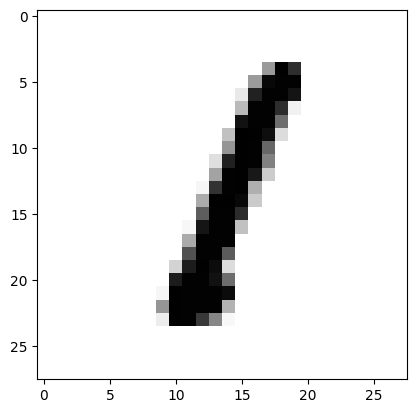

Prediction:  1


In [12]:
# Exibindo uma previsão
random_index = randint(0, len(predictions_alt))
plt.imshow(x_test_alt[random_index], cmap=plt.cm.binary)
plt.show()
print('Prediction: ', np.argmax(predictions_alt[random_index]))